# Part 1: Data preprocessing

### Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

### Data exploration

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# statistical summary
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Dealing with missing data

In [7]:
dataset.isnull().values.any()

False

In [8]:
dataset.isnull().values.sum()

0

In [9]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
dataset.select_dtypes('object').columns

Index(['Geography', 'Gender'], dtype='object')

In [12]:
dataset.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
dataset.Gender.unique()

array(['Female', 'Male'], dtype=object)

### Label encoding

In [14]:
dataset = pd.get_dummies(data=dataset, drop_first=True)
dataset = dataset.astype('int')

In [15]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [16]:
# Customers staying with bank
(dataset.Exited == 0).sum()

7963

In [17]:
# Customers leaving the bank
(dataset.Exited == 1).sum()

2037

### Correlation matrix and heatmap

<Axes: title={'center': 'Correlation with Exited'}>

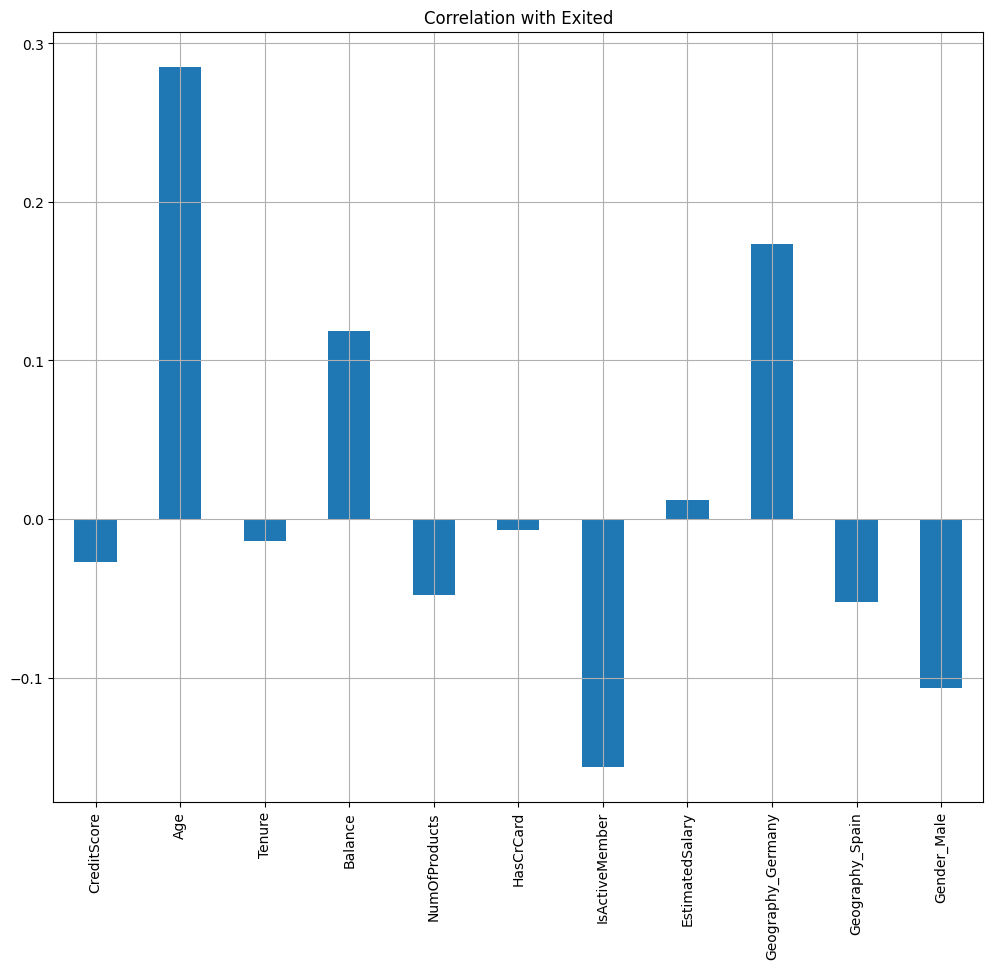

In [18]:
dataset_2 = dataset.drop('Exited', axis=1)
dataset_2.corrwith(dataset['Exited']).plot.bar(
    figsize=(12, 10), title='Correlation with Exited',
    grid=True
)

In [19]:
corr = dataset.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304179,-0.014858,-0.010084,0.012798,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304179,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012798,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


<Axes: >

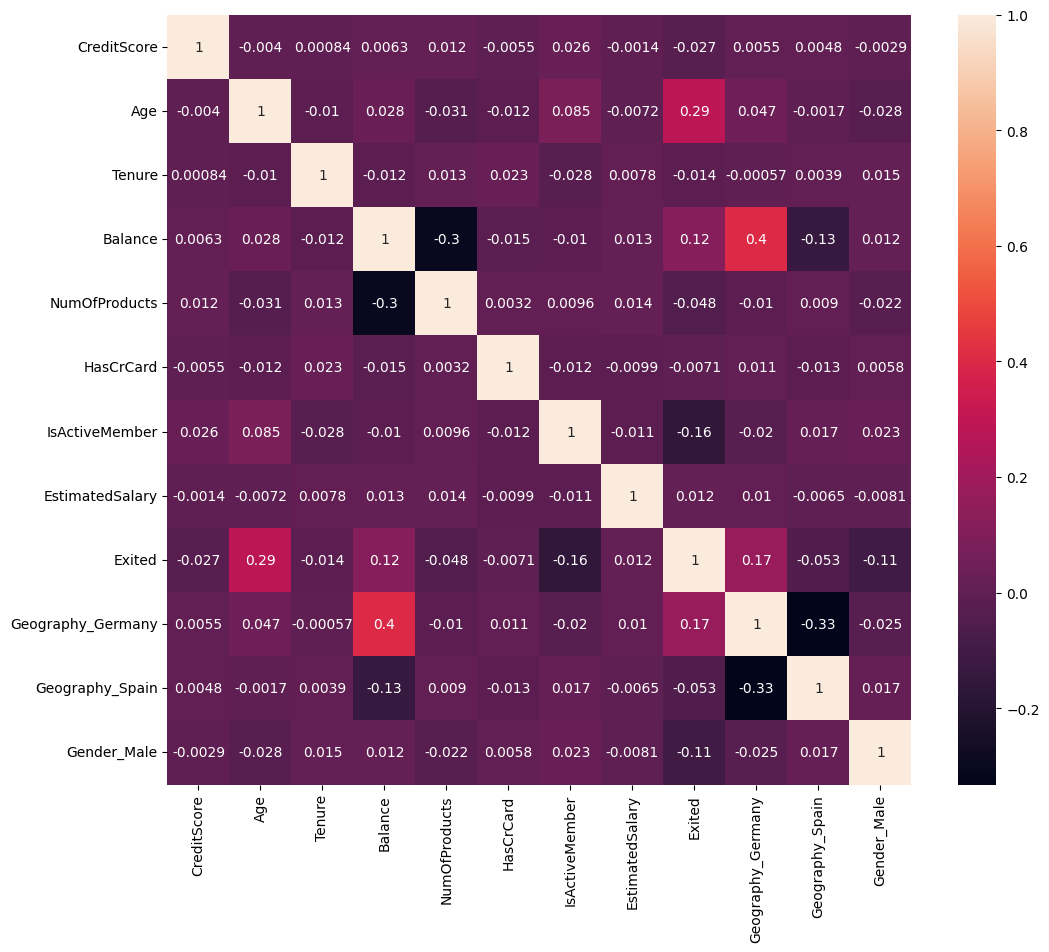

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)

#### Split into train and test data

In [21]:
X = dataset.drop(columns='Exited')
y = dataset['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Applying  feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2: Buidling model

### 1) Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
y_pred = classifier_lr.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
fs = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

result = pd.DataFrame([['Logistic Regression', acc, prec, rec, fs]],
                     columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
result

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.811,0.581818,0.237037,0.336842


In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


### 2) Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
y_pred = classifier_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
fs = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, fs]],
                     columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

result = pd.concat([result, model_results], ignore_index=True)
result

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.811,0.581818,0.237037,0.336842
1,Random Forest,0.866,0.740351,0.520988,0.611594


#### Cross validation and confusion matrix

In [34]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf, X=X_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.96 %
Standard Deviation is 1.04 %


In [35]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1521   74]
 [ 194  211]]


### 3) XGBoost

In [38]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [39]:
y_pred = classifier_xgb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

result = pd.concat([result, model_results], ignore_index=True)
result

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.811,0.581818,0.237037,0.336842
1,Random Forest,0.866,0.740351,0.520988,0.611594
2,XGBoost,0.855,0.687296,0.520988,0.592697


#### Cross validation adn Confusion matrix

In [40]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=X_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.25 %
Standard Deviation is 1.19 %


In [41]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1499   96]
 [ 194  211]]


## Part 4: Grid search to find the best parameters (Random Forest)

In [44]:
from sklearn.model_selection import GridSearchCV

parameters={
    'n_estimators': [100, 200, 150, 125, 175, 300, 400, 500],
    'max_depth': [None, 3, 4, 5, 6, 7, 8, 10 ,12, 13, 15],
    'min_samples_split': [2, 5, 10, 12, 14],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_jobs': [-1]
}

grid_search = GridSearchCV(estimator=classifier_rf, param_grid=parameters, scoring='roc_auc', n_jobs=-1,
                          cv=5, verbose=3,)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6600 candidates, totalling 33000 fits


C:\Users\FARZIN\anaconda3\envs\machine_learning_projects\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10, 12, 14],
                         'n_estimators': [100, 200, 150, 125, 175, 300, 400,
                                          500],
                         'n_jobs': [-1]},
             scoring='roc_auc', verbose=3)

In [46]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=13, max_features='auto', min_samples_leaf=5,
                       n_estimators=300, n_jobs=-1, random_state=0)

In [47]:
grid_search.best_params_

{'max_depth': 13,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 300,
 'n_jobs': -1}

In [48]:
grid_search.best_score_

0.8634432995577628

## Part 5: Final Model (Random Forest)

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=13, max_features='auto', min_samples_leaf=5,
                       n_estimators=300, n_jobs=-1, random_state=0)
classifier.fit(X_train, y_train)

C:\Users\FARZIN\anaconda3\envs\machine_learning_projects\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=13, max_features='auto', min_samples_leaf=5,
                       n_estimators=300, n_jobs=-1, random_state=0)

In [51]:
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest final', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

result = pd.concat([result, model_results], ignore_index=True)
result

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8110,0.581818,0.237037,0.336842
1,Random Forest,0.8660,0.740351,0.520988,0.611594
2,XGBoost,0.8550,0.687296,0.520988,0.592697
3,Random Forest final,0.8705,0.776515,0.506173,0.612855


#### Cross validation and Confusion matrix

In [53]:
# cross validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))


C:\Users\FARZIN\anaconda3\envs\machine_learning_projects\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\FARZIN\anaconda3\envs\machine_learning_projects\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\FARZIN\anaconda3\envs\machine_learning_projects\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, ex

Accuracy is 86.57 %
Standard Deviation is 0.83 %


In [54]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1536   59]
 [ 200  205]]


# Part 6: Predicting a single observation

In [60]:
dataset.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1
9999,792,28,4,130142,1,1,0,38190,0,0,0,0


In [56]:
dataset.shape

(10000, 12)

In [58]:
X_test.shape

(2000, 11)

In [65]:
single_obs = [[819,	25,	7,	0,	1,	0,	1,	62545,	0,	0,	1]]
print(classifier.predict(sc.transform(single_obs)))

[0]


C:\Users\FARZIN\anaconda3\envs\machine_learning_projects\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
